# An example Jupyter notebook as a guide for efficient data analysis

let's start easy: The jupyter notebook works wonderfully with basic python: 

In [58]:
print("hello, nice", 1+1, "meet you")

hello, nice 2 meet you


But to be able to perform proper data analysis and plotting, some packages are quite useful:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We can now load datasets from our computer into the jupyter notebook using the pandas package. Creating tables of varied parameters and effects can be useful to do already during your experiment. 

If you want to share your jupyter notebook with others, putting the data into an inner folder and using a relative link can be very useful.

In [11]:
nonanal_vapP = pd.read_csv('./Cloud16_nonanal_vaporPressure.csv', delimiter = '\t', index_col = 0)

If you add data, functions, plots... from other sources, make sure to cite them. For example: 

The data loaded as "nonanal_vapP" are taken from Verevkin et al., 2003: 

*Verevkin, Sergey & Krasnykh, Eugen & Vasiltsova, Tatiana & Koutek, Bohumír & Doubsky, Jan & Heintz, Andreas. (2003). Vapor pressures and enthalpies of vaporization of a series of the linear aliphatic aldehydes. Fluid Phase Equilibria. 206. 331-339. 10.1016/S0378-3812(03)00035-9.*

or just add a working link to it: 

The data loaded as "nonanal_vapP" are taken from [Verevkin et al., 2003](https://www.doi.org/10.1016/S0378-3812(03)00035-9)


The variable is now also available for all following code snippets in the notebook: Let's see, if we can access and plot it:

In [12]:
nonanal_vapP

,pressure [Pa]
temperature [Kelvin],
275.7,7.65
278.8,10.14
281.8,12.87
284.8,17.16
287.9,21.43
290.9,27.46
294.0,35.31
297.1,44.28
300.1,55.64


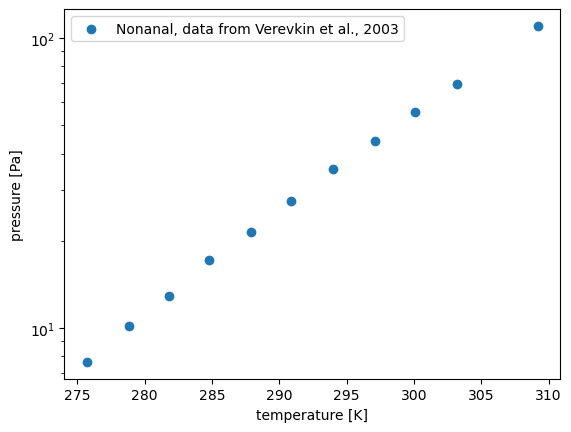

In [26]:
plt.scatter(nonanal_vapP.index, (nonanal_vapP['pressure [Pa]']), label = 'Nonanal, data from Verevkin et al., 2003')
plt.xlabel('temperature [K]')
plt.ylabel('pressure [Pa]')
plt.yscale('log')
plt.legend()

Now let's do further data analysis. The increase appears to be close to linear on the semilog plot, so let's define a fit function that would also look linear on this plot, optimize its parameters using the curve_fit function from the scipy.optimize package and see, how well it fits the data. 

Note, how I import this function compared to how I imported full packages earlier. Only importing one function instead of the whole package is sometimes helpful, if the package is very large and importing it would slow down your system (recommended for all scipy functions...)

In [60]:
from scipy.optimize import curve_fit

def exponential(x, a, b):
    y_res = a*b**x
    return y_res

params, cov = curve_fit(exponential, nonanal_vapP.index, nonanal_vapP['pressure [Pa]'])

print("the fit parameters of the exponential are: ", params)
print("the covariance matrix of the fit is: \n", cov)
print("and the 1-standard-deviation errors of the respective parameters:", np.sqrt(np.diag(cov)))

the fit parameters of the exponential are:  [6.12298023e-09 1.07936693e+00]
the covariance matrix of the fit is: 
 [[ 1.05337134e-18 -6.11283096e-13]
 [-6.11283096e-13  3.54913530e-07]]
and the 1-standard-deviation errors of the respective parameters: [1.02633880e-09 5.95746196e-04]


We could compare the result in the next step with parameters from literature ([Verevkin et al., 2003](https://www.doi.org/10.1016/S0378-3812(03)00035-9)): 

Our fit is overestimating the measurements below 285K by up to 10% and overestimates predicted values from the fit function of Verevkin et al., 2003 above 310K. It can be expected, that the deviation increases for temperatures outside this range. 

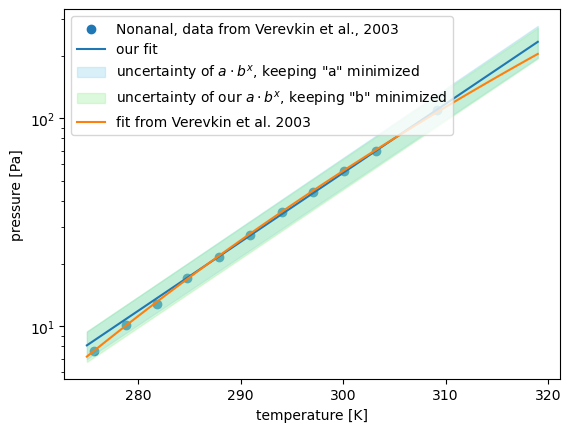

In [63]:
temp = np.arange(275,320,step=1) # temperature x-array for the fits

fit_y = exponential(temp, params[0], params[1]) # fit with our fitfunction from above
fit_y_low_a = exponential(temp, params[0], params[1]-np.sqrt(np.diag(cov))[1]) # lower limit to our fit
fit_y_up_a = exponential(temp, params[0], params[1]+np.sqrt(np.diag(cov))[1]) # upper limit to our fit

fit_y_low_b = exponential(temp, params[0]-np.sqrt(np.diag(cov))[0], params[1]) # lower limit to our fit
fit_y_up_b = exponential(temp, params[0]+np.sqrt(np.diag(cov))[0], params[1]) # upper limit to our fit


R = 8.31451 # gas constant
fit_y_lit = np.exp(314.517/R - 84141.195/(R*temp) - 96.63/R * np.log(temp/298.15)) # fit from Verevkin et al., 2003


plt.scatter(nonanal_vapP.index, (nonanal_vapP['pressure [Pa]']), label = 'Nonanal, data from Verevkin et al., 2003')
plt.xlabel('temperature [K]')
plt.ylabel('pressure [Pa]')
plt.plot(temp, fit_y, label = 'our fit')
plt.fill_between(temp, fit_y_low_a, fit_y_up_a, alpha = 0.3, color = "skyblue", label = r'uncertainty of $a\cdot b^x$, keeping "a" minimized')
plt.fill_between(temp, fit_y_low_b, fit_y_up_b, alpha = 0.3, color = "lightgreen", label = r'uncertainty of our $a\cdot b^x$, keeping "b" minimized')
plt.plot(temp, fit_y_lit, label = 'fit from Verevkin et al. 2003')
plt.yscale('log')
plt.legend()

Finish your analysis with some discussion

Because an .ipynb file is nothing else than a text file, it is small and easy to share with your collegues. Therefore, this is a great way to perform analyses together.